![](OptimumG2018.png)
# Bicycle Model Exercises
## Step and impulse response at 3 different speeds

The following code shows how to you can used python to run vehicle dynamics simulation.
 In this example we will create a bicycle model.
 
 To create the model we will be using state space equations. If you are not familiar with them 
 we recommend that you read the following wikipedia article: https://en.wikipedia.org/wiki/State-space_representation

 In this example we simulate the same vehicle at three different speeds:
 
 * 5m/s
 * 15m/s
 * 25m/s

We will plot the results and analyze the vehicle dynamics.

In [ ]:
from IPython import get_ipython
from scipy import signal
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt

The above statement import 3 libraries that we will be using in this example:


* scipy - Library for scientific computing - It contains the functions that allows us to 
create a state space model and run step, impulse responses.
* numpy - Base N-dimensional array package - Library that allows us to create matrixes and vectors
* matplolib - 2D Plotting tool - Library that allows the user to plot

For more information on these package please visit the following link: https://www.scipy.org/


## Model Creation

The first step is to define the variable that we will be using.

* $m$ - Vehicle mass
* $C_{\alpha f}$ - Front Cornering Stiffness
* $C_{\alpha r}$ - Rear Cornering Stiffness
* $I_{zz}$ - Vehicle Inertia in Yaw
* $a$ - Front wheelbase
* $b$ - Rear wheelbase

In [2]:
m = 1000.0 #Kg
C_alpha_f = 60000.0 #N/rad
C_alpha_r = 60000.0 #N/rad
Izz = 1650.0 #kg m^2
a = 1.0 #m
b = 1.5 #m

## Creating a vehicle model to be simulate at 5m/s


In [3]:
vx = 5 #m/s

A = np.array(
    [
        [-(C_alpha_f + C_alpha_r) / (m * vx),           (-a * C_alpha_f + b * C_alpha_r) / (m*vx) - vx],
        [-(a * C_alpha_f - b * C_alpha_r) / (Izz * vx),   -(a**2 * C_alpha_f + b**2 * C_alpha_r) / (Izz*vx)]
    ]
            )

B = np.array(
    [
        [C_alpha_f/m],
        [(a * C_alpha_f) / Izz]
    ]
)

C = np.array(
    [
        [1,0],
        [0,1]
    ]
)

D = np.array([[0],[0]])

sys_5 = signal.StateSpace(A,B,C,D)

## Creating a vehicle model to be simulate at 15m/s


In [4]:
vx = 15

A = np.array(
    [
        [-(C_alpha_f + C_alpha_r) / (m * vx),           (-a * C_alpha_f + b * C_alpha_r) / (m*vx) - vx],
        [-(a * C_alpha_f - b * C_alpha_r) / (Izz * vx),   -(a**2 * C_alpha_f + b**2 * C_alpha_r) / (Izz*vx)]
    ]
            )

B = np.array(
    [
        [C_alpha_f/m],
        [(a * C_alpha_f) / Izz]
    ]
)

C = np.array(
    [
        [1,0],
        [0,1]
    ]
)

D = np.array([[0],[0]])

sys_15 = signal.StateSpace(A,B,C,D)

## Creating a vehicle model to be simulate at 5m/s


In [5]:
vx = 25

A = np.array(
    [
        [-(C_alpha_f + C_alpha_r) / (m * vx),           (-a * C_alpha_f + b * C_alpha_r) / (m*vx) - vx],
        [-(a * C_alpha_f - b * C_alpha_r) / (Izz * vx),   -(a**2 * C_alpha_f + b**2 * C_alpha_r) / (Izz*vx)]
    ]
            )

B = np.array(
    [
        [C_alpha_f/m],
        [(a * C_alpha_f) / Izz]
    ]
)

C = np.array(
    [
        [1,0],
        [0,1]
    ]
)

D = np.array([[0],[0]])

sys_25 = signal.StateSpace(A,B,C,D)

In [6]:
t_5,y_5 = signal.step(sys_5, T=np.linspace(0,1.5,50))
t_15,y_15 = signal.step(sys_15, T=np.linspace(0,1.5,50))
t_25,y_25 = signal.step(sys_25, T=np.linspace(0,1.5,50))


vy_5 = y_5[:,0]
r_5 = y_5[:,1]

vy_15 = y_15[:,0]
r_15 = y_15[:,1]

vy_25 = y_25[:,0]
r_25 = y_25[:,1]



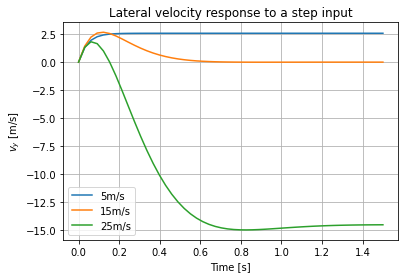

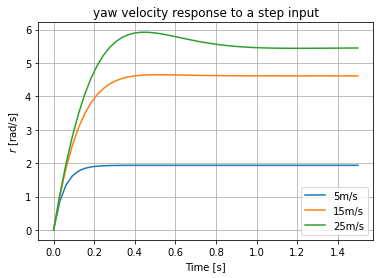

In [7]:
# Plot lateral velocity
plt.figure()
plt.plot(t_5,vy_5)
plt.plot(t_15,vy_15)
plt.plot(t_25,vy_25)
plt.title("Lateral velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$v_y$ [m/s]")
plt.legend(["5m/s","15m/s","25m/s"])
plt.grid(True)

# Plot the yaw rate
plt.figure()
plt.plot(t_5,r_5)
plt.plot(t_15,r_15)
plt.plot(t_25,r_25)
plt.title("yaw velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$r$ [rad/s]")
plt.legend(["5m/s","15m/s","25m/s"])
plt.grid(True)

In [8]:
t_5,y_5 = signal.impulse(sys_5, T=np.linspace(0,1.5,50))
t_15,y_15 = signal.impulse(sys_15, T=np.linspace(0,1.5,50))
t_25,y_25 = signal.impulse(sys_25, T=np.linspace(0,1.5,50))


vy_5 = y_5[:,0]
r_5 = y_5[:,1]

vy_15 = y_15[:,0]
r_15 = y_15[:,1]

vy_25 = y_25[:,0]
r_25 = y_25[:,1]

# Plot lateral velocity
plt.figure()
plt.plot(t_5,vy_5)
plt.plot(t_15,vy_15)
plt.plot(t_25,vy_25)
plt.title("Lateral velocity response to an impulse")
plt.xlabel("Time [s]")
plt.ylabel("$v_y$ [m/s]")
plt.legend(["5m/s","15m/s","25m/s"])
plt.grid(True)

# Plot the yaw rate
plt.figure()
plt.plot(t_5,r_5)
plt.plot(t_15,r_15)
plt.plot(t_25,r_25)
plt.title("yaw velocity response to an impulse")
plt.xlabel("Time [s]")
plt.ylabel("$r$ [rad/s]")
plt.legend(["5m/s","15m/s","25m/s"])
plt.grid(True)

Author: Joao Antunes

Date: May, 2020